[go here](#here)

# [NSF's OIR Lab](https://nationalastro.org/) Astro Archive: Advanced Search

[Community Science and Data Center](https://nationalastro.org/programs/csdc/)

## Table Of Contents:
* [Goals & notebook summary](#goals)
* [Imports and setup](#init)
* [Details](#details)
* [Documentation](#doc)

<a class="anchor" id="goals"></a>
# Goals
Instructions and examples for using Advanced Search API for accessing OIRLab Archive metadata.

# Notebook Summary
We show you how to use the API to search the Archive for FITS files by **any** field in the FITS headers.

## Imports and setup <a id="init">
Some of these imports are just for presentation in the juypter notebook.  You may not need it all.

In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import astropy.io.fits as pyfits
import astropy.utils as autils
import requests
import json
from pprint import pprint as pp

print(f'Using Python version: {sys.version}')

Using Python version: 3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]


In [12]:
%run utils.ipynb
tic()

adsurl = f'{natroot}/api/adv_search'
adsurl

'https://marsnat2.pat.dm.noao.edu/api/adv_search'

## Details <a id="details">

* [Successful proprietary file retrieve with authentication](#good_auth)
* [Unsuccessful proprietary file retrieve with BAD authentication](#bad_auth)
* [Unsuccessful proprietary file retrieve with NO authentication](#no_auth)


### Find some proprietary files



In [3]:
jj = {
    "outfields" : [
        "md5sum",
        "archive_filename",
        "telescope",
        "instrument",
        "obs_type",
        "release_date",
        "proposal",
    ],
    "search" : [
        ["release_date", '2020-02-18','2020-11-18'], # proprietary
        ["obs_type", 'object'],
    ]
}
apiurl = f'{adsurl}/fasearch/?limit=9'
print(f'Using API url: {apiurl}')
ads_df = pd.read_json(json.dumps(requests.post(apiurl,json=jj).json()))
ads_df

Using API url: https://marsnat1.stage.dm.noao.edu/api/adv_search/fasearch/?limit=9


,archive_filename,instrument,md5sum,obs_type,proposal,release_date,telescope,url
0,/net/archive/mtn/20181129/ct4m/2012B-0001/c4d_...,decam,00001e23920e44bc3ce9c6c3e03a5549,object,2012B-0001,2020-05-22,ct4m,https://marsnat1.stage.dm.noao.edu/api/adv_sea...
1,/net/archive/pipe/20190518/ct4m/2019A-0325/c4d...,decam,0000283b256063676c71fa4603f9b609,object,2019A-0325,2020-11-08,ct4m,https://marsnat1.stage.dm.noao.edu/api/adv_sea...
2,/net/archive/pipe/20190407/ct4m/2017A-0281/c4d...,decam,00002d25d6e826209dfcd2ad6f9ebc0d,object,2017A-0281,2020-09-28,ct4m,https://marsnat1.stage.dm.noao.edu/api/adv_sea...
3,/net/archive/pipe/20190205/ct4m/2014B-0404/c4d...,decam,00002e92e8772d5134433c47e6278af2,object,2014B-0404,2020-07-29,ct4m,https://marsnat1.stage.dm.noao.edu/api/adv_sea...
4,/net/archive/pipe/20181127/ct4m/2012B-0001/c4d...,decam,0000364628e7f179919d08faadadbe01,object,2012B-0001,2020-05-20,ct4m,https://marsnat1.stage.dm.noao.edu/api/adv_sea...
5,/net/archive/pipe/20190327/ct4m/2019A-0101/c4d...,decam,000056a42693a62daccbf84671e08d0a,object,2019A-0101,2020-09-17,ct4m,https://marsnat1.stage.dm.noao.edu/api/adv_sea...
6,/net/archive/mtn/20190214/ct4m/2019A-0325/c4d_...,decam,000084ab7f1c312e70cf38a6cc7afcdb,object,2019A-0325,2020-08-07,ct4m,https://marsnat1.stage.dm.noao.edu/api/adv_sea...
7,/net/archive/pipe/20190322/ct4m/2019A-0101/c4d...,decam,00008e47581a9e627460a96fe6da9742,object,2019A-0101,2020-09-12,ct4m,https://marsnat1.stage.dm.noao.edu/api/adv_sea...
8,/net/archive/pipe/20181009/ct4m/2012B-0001/c4d...,decam,0000bd84610434f7c60b484b58cfce6c,object,2012B-0001,2020-04-01,ct4m,https://marsnat1.stage.dm.noao.edu/api/adv_sea...


### Get PUBLIC file

Retrieve (download) file by id with:
	https://marsnat2.pat.dm.noao.edu/api/retrieve/0000298c7e0b3ce96b3fff51515a6100
You can also click on this link.


(2112, 2112)

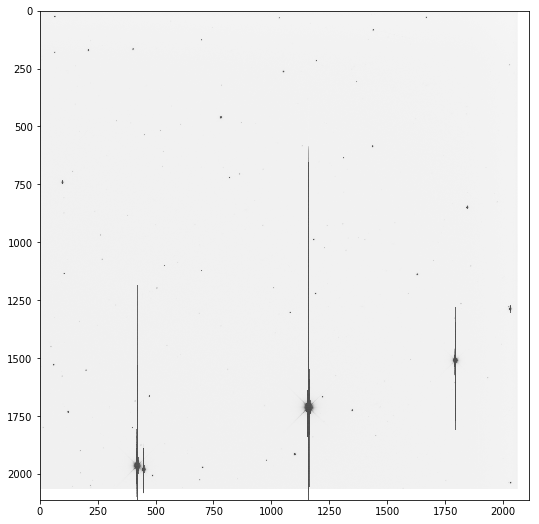

In [13]:
fileid = publicFileId
fileurl = f'{natroot}/api/retrieve/{fileid}'
print(f'Retrieve (download) file by id with:\n\t{fileurl}')
print('You can also click on this link.')
zimage = pyfits.getdata(autils.data.download_file(fileurl,cache=True,show_progress=False,timeout=120))
plt.rcParams["figure.figsize"] = [16,9]
plt.imshow(zimage,cmap=matplotlib.cm.gray_r)
zimage.shape

# HERE !!! <a id="here">

### Attempt to get PROPRIETARY file with invalid credentials

In [17]:
token = None
headers = dict()
fileid = proprietaryFileId
fileurl = f'{natroot}/api/retrieve/{fileid}'
tokurl = f'{natroot}/api/get_token/'
auth = dict(email='bas@noao.edu', password='joe-hacker')
print(f'fileurl={fileurl}\ntokurl={tokurl}\nauth={auth}')

fileurl=https://marsnat2.pat.dm.noao.edu/api/retrieve/00011e9a2b1a96d292be2b59a729cfdc
tokurl=https://marsnat2.pat.dm.noao.edu/api/get_token/
auth={'email': 'bas@noao.edu', 'password': 'joe-hacker'}


In [18]:
r = requests.post(tokurl, json=auth)
if r.status_code == 200:
    token = r.content.decode("utf-8")
    headers = dict(Authorization=token)
    print(f'headers={headers}')
    r2 = requests.get(fileurl,headers=headers)
    if r2.status_code == 200:
        print(f'token={token} file-size={len(r2.content):,} fileurl={fileurl} ')
    else:
        print(r2.json()['message'])
else:
    print(token['detail'])

headers={'Authorization': '{"detail": "No active account found with the given credentials"}'}
This file is not available until 2020-06-12


In [14]:
token = None
headers = dict()
fileid = proprietaryFileId
fileurl = f'{natroot}/api/retrieve/{fileid}'
tokurl = f'{natroot}/api/get_token/'
auth = dict(email=testUserEmail, password=testUserPassword)
print(f'fileurl={fileurl}\ntokurl={tokurl}\nauth={auth}')

fileurl=https://marsnat2.pat.dm.noao.edu/api/retrieve/00011e9a2b1a96d292be2b59a729cfdc
tokurl=https://marsnat2.pat.dm.noao.edu/api/get_token/
auth={'email': 'nobody999@noao.edu', 'password': 'test-user-password'}


In [15]:
r = requests.post(tokurl, json=auth)
if r.status_code == 200:
    token = r.content.decode("utf-8")
    headers = dict(Authorization=token)
    print(f'headers={headers}')
    r2 = requests.get(fileurl,headers=headers)
    if r2.status_code == 200:
        print(f'token={token} file-size={len(r2.content):,} fileurl={fileurl} ')
    else:
        print(r2.json()['message'])
else:
    print(token['detail'])

headers={'Authorization': '{"detail": "No active account found with the given credentials"}'}
This file is not available until 2020-06-12


In [ ]:
auth

In [ ]:
# Older versions of Astropy do not accept "http_headers" keyword
#! zimage = pyfits.getdata(autils.data.download_file(fileurl,http_headers=headers,cache=True,show_progress=False,timeout=120))
open('temp.fits', 'wb').write(r2.content) # write temp file
zimage = pyfits.getdata('temp.fits')
plt.rcParams["figure.figsize"] = [16,9]
plt.imshow(zimage,cmap=matplotlib.cm.gray_r)
zimage.shape

In [ ]:
plt.imshow(zimage[100:300, 0:200],cmap=matplotlib.cm.gray_r)

### (Test file in PAT from Sean and Frank)

In [ ]:
prfileid = 'a96e55509a4cf89ebcc3126bef2e6aa7'
fileurl = f'{natroot}/api/natica/retrieve/{prfileid}'

auth = dict(email='nobody@noao.edu', password='xyzzy')
tokurl = f'{natroot}/api/get_token/'
r = requests.post(tokurl, json=auth)
token = r.content

print(f'Got token="{token}" using {tokurl}; fileurl={fileurl}')

In [ ]:
r2 = requests.get(fileurl)
print(f'HTTP-Status={r2.status_code} File-size={len(r2.content):,}')
if r2.status_code == 200:
    zimage = pyfits.getdata(autils.data.download_file(fileurl,cache=True,show_progress=False,timeout=120))
    plt.rcParams["figure.figsize"] = [32,18]
    plt.imshow(zimage,cmap=matplotlib.cm.gray_r)
    zimage.shape
else:
    print(r2.json())

In [ ]:
import datetime
elapsed = toc()
print(f'Elapsed seconds={elapsed}')
str(datetime.datetime.now())

# Resources and references <a id="doc" />

[dal API](http://marsnat2.pat.dm.noao.edu:8000/api-docs/#/dal)
We should look at fancy annotation to make this better. Programmers will want clear doc of what parameters can be passed to each service.

[Data  Models](https://marsnat2.pat.dm.noao.edu:8000/admin/doc/models/)